In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [390]:
calls = pd.read_csv('./datasets/calls.csv')
internet = pd.read_csv('./datasets/internet.csv', index_col=0)
messages = pd.read_csv('./datasets/messages.csv')
tariffs = pd.read_csv('./datasets/tariffs.csv')
users = pd.read_csv('./datasets/users.csv')  

## Examining datasets

### Calls dataset

In [391]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


The table columns contain the following information about the calls:

- id - unique call number
- call_date - date of the call
- duration - duration of the call in minutes
- user_id - identifier of the user who made the call

In [392]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [393]:
print(f'Null values:\n{calls.isnull().sum()}\n')
print(f'Duplicated values: {calls.duplicated().sum()}')

Null values:
id           0
call_date    0
duration     0
user_id      0
dtype: int64

Duplicated values: 0


In [394]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

The maximum talk time is 38 minutes, with an average talk time of about 6 minutes and 45 seconds or 6 minutes based on the median. The minimum talk time is 0 minutes, which is possibly a missing value. We will return to this column later in the data preprocessing phase.

### Internet dataset

In [395]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


The table columns contain the following information about Internet sessions:

- id - unique session number
- mb_used - amount of internet traffic consumed during the session (in megabytes)
- session_date - date of the Internet session
- user_id - user ID

In [396]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [397]:
print(f'Null values:\n{internet.isnull().sum()}\n')
print(f'Duplicated values: {internet.duplicated().sum()}')

Null values:
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Duplicated values: 0


Let's check the column with the amount of traffic consumed for negative and outlier values.

In [398]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

On average, a user uses 370 mb of traffic per session, the highest value is 1725 mb, and the smallest session has a value of 0 mb. Most likely, this is missing data that needs to be processed. We will come back to them later, during the data preprocessing phase.

### Messages dataset

In [399]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


The table columns contain the following information about user messages:

- id - unique message number
- message_date - message date
- user_id - identifier of the user who sent the message

In [400]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [401]:
print(f'Null values:\n{messages.isnull().sum()}\n')
print(f'Duplicated values: {messages.duplicated().sum()}')

Null values:
id              0
message_date    0
user_id         0
dtype: int64

Duplicated values: 0


### Tariffs dataset

In [402]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,gbp_monthly_fee,gbp_per_gb,gbp_per_message,gbp_per_minute,tariff_name
0,50,15360,500,6,2.0,0.03,0.03,smart
1,1000,30720,3000,20,1.5,0.01,0.01,unlimited


The dataset columns contain the following information:

- tariff_name - tariff name
- gbp_monthly_fee - monthly subscription fee in pound sterling
- minutes_included - number of minutes per month included in the subscription fee
- messages_included - number of messages per month included in the subscription fee
- mb_per_month_included - amount of Internet traffic included in the subscription fee (in megabytes)
- gbp_per_minute - cost of a minute of call over the tariff package (for example, if the tariff includes 100 minutes of call per month, then 101 minutes will be charged)
- gbp_per_message - cost of sending a message in excess of the tariff package
- gbp_per_gb - cost of additional gigabyte of Internet traffic over the tariff package (1 gigabyte = 1024 megabytes).

In [403]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   gbp_monthly_fee        2 non-null      int64  
 4   gbp_per_gb             2 non-null      float64
 5   gbp_per_message        2 non-null      float64
 6   gbp_per_minute         2 non-null      float64
 7   tariff_name            2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes


### Users dataset

In [404]:
users.head()

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaN,Manchester,2018-05-25,unlimited
1,1001,41,NaN,London,2018-11-01,smart
2,1002,59,NaN,Sheffield,2018-06-17,smart
3,1003,23,NaN,London,2018-08-17,unlimited
4,1004,68,NaN,Bristol,2018-05-14,unlimited


The table columns contain the following information about users:

- user_id - unique user identifier
- age - user's age (years)
- reg_date - date of tariff connection (day, month, year)
- churn_date - date of tariff termination (if the value is missing, the tariff was still valid at the moment of data upload)
- city - city of user's residence
- tariff - name of tariff plan

In [405]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   reg_date    500 non-null    object
 5   tariff      500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [406]:
print(f'Null values:\n{users.isnull().sum()}\n')
print(f'Duplicated values: {users.duplicated().sum()}')

Null values:
user_id         0
age             0
churn_date    462
city            0
reg_date        0
tariff          0
dtype: int64

Duplicated values: 0


There are gaps in the **‘churn_date’** column, but these gaps mean that the user's tariff was valid at the time of upload. Since information on tariff termination is not required for further analysis, it is not necessary to process and fill in these blanks.


In [407]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

The youngest client is 18 years old, the oldest client is 75 years old, the average age of users is 47 years old. No anomalies were found.


In [408]:
users['tariff'].value_counts()

tariff
smart        351
unlimited    149
Name: count, dtype: int64

In [409]:
percent_of_churn_gaps = len(users[users['churn_date'].isna()])*100/len(users)
print(f'The ‘churn_date’ column is missing {percent_of_churn_gaps}% of the data')

The ‘churn_date’ column is missing 92.4% of the data


## Data preprocessing

### Changing data types

Let's change the data type in the columns with dates for all dataframes. To do this, we use the pd.to_datetime() method

In [410]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [411]:
calls['duration'] = np.ceil(calls['duration'])
calls = calls.astype({'duration': int})

### Handling missing values

In [412]:
silent_calls = calls.query('duration == 0')
silent_calls_percent = len(silent_calls) / len(calls)
print(f'Number of calls with duration of 0 seconds: {silent_calls['duration'].count()}')
print('The ratio of the number of silent calls to the number of all calls: {:.2%}'.format(silent_calls_percent))

Number of calls with duration of 0 seconds: 39613
The ratio of the number of silent calls to the number of all calls: 19.55%


In the **calls** table, almost 20% of all call duration values are null. This could be due to a data storage error or other failure. They could also be due to the call tracking system filling in missed or unexcused calls as null values.

In [413]:
empty_sessions = internet.query('mb_used == 0')
empty_sessions_percent = len(empty_sessions) / len(internet)
print(f'Number of sessions without traffic consumption: {empty_sessions['mb_used'].count()}')
print('Ratio of the number of empty sessions to the number of all sessions: {:.2%}'.format(empty_sessions_percent))

Number of sessions without traffic consumption: 19598
Ratio of the number of empty sessions to the number of all sessions: 13.12%


In [414]:
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [415]:
calls_copy = calls.copy()

In [416]:
calls_copy = calls_copy.drop(calls_copy[calls_copy['duration'] == 0 ]['duration'].index).reset_index(drop = True)

In [417]:
calls_copy['duration'].describe()

count    162994.000000
mean          8.897880
std           5.353761
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64

Mean and median increased significantly after removing the zero values.

We will treat zero values of call duration as missed or unanswered calls, and zero traffic consumption as an incorrectly stored session in which the user did not spend any traffic.

### Adding new data to the table

For further analysis we will need to group the data on calls, messages and Internet traffic by month. Let's add a new column to the corresponding tables with the month of the operation performed by the user

In [418]:
calls['month'] = calls['call_date'].dt.month 
internet['month'] = internet['session_date'].dt.month 
messages['month'] = messages['message_date'].dt.month 

### Pivot table to calculate revenue by month

#### 1. Counting the number of calls made and minutes spent by month.

In [419]:
calls_per_month = calls.pivot_table(index=['user_id', 'month'], 
                                    values='duration', 
                                    aggfunc=['count', 'sum'])
calls_per_month.columns = ['calls_count', 'calls_duration']
calls_per_month.head()

calls_count  calls_duration
user_id month                             
1000    5               22             159
        6               43             172
        7               47             340
        8               52             408
        9               58             466

#### 2. Counting the amount of traffic consumed by month for each user.

In [420]:
mb_used_per_month = internet.pivot_table(index=['user_id', 'month'], 
                                         values='mb_used', 
                                         aggfunc='sum')
mb_used_per_month.columns = ['mb_used_sum'] 
mb_used_per_month['mb_used_sum'] = np.ceil(mb_used_per_month['mb_used_sum'])
mb_used_per_month.head()

mb_used_sum
user_id month             
1000    5           2254.0
        6          23234.0
        7          14004.0
        8          14056.0
        9          14569.0

#### 3. Counting the number of sent messages by month for each user.

In [421]:
messages_per_month = messages.pivot_table(index=['user_id', 'month'], 
                                          values='message_date',
                                          aggfunc='count')
messages_per_month.columns = ['msg_count']
messages_per_month.head()

msg_count
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57

#### 4. Counting monthly revenue per user.

In [422]:
users_pivot = calls_per_month.join([mb_used_per_month, messages_per_month], how='outer')
users_pivot.head()

calls_count  calls_duration  mb_used_sum  msg_count
user_id month                                                     
1000    5             22.0           159.0       2254.0       22.0
        6             43.0           172.0      23234.0       60.0
        7             47.0           340.0      14004.0       75.0
        8             52.0           408.0      14056.0       81.0
        9             58.0           466.0      14569.0       57.0

In [423]:
users_pivot = users_pivot.join(users.loc[:,['user_id', 'tariff']].set_index('user_id'),
                               how='outer')

In [424]:
users_pivot.head()

calls_count  calls_duration  mb_used_sum  msg_count     tariff
user_id month                                                                
1000    5             22.0           159.0       2254.0       22.0  unlimited
        6             43.0           172.0      23234.0       60.0  unlimited
        7             47.0           340.0      14004.0       75.0  unlimited
        8             52.0           408.0      14056.0       81.0  unlimited
        9             58.0           466.0      14569.0       57.0  unlimited

However, earlier we could notice that all tables have different number of rows. This is because some users did not have information for specific months, for example, they may not have sent any messages in a month, or they may not have accessed the Internet. This means that there are gaps in our summary table. We will fill them with zeros, based on the logic that the user did not perform any actions in a certain period.

In [425]:
users_pivot.fillna(0, inplace=True)
users_pivot.isnull().sum()

calls_count       0
calls_duration    0
mb_used_sum       0
msg_count         0
tariff            0
dtype: int64

Also to test the hypotheses we need information about the users' city, let's add it to the table.

In [426]:
users_pivot = users_pivot.join(users.loc[:,['user_id', 'city']].set_index('user_id'), how='outer')

Now we can add a column of gigabytes used by the user in each month

In [427]:
users_pivot['gb_used_sum'] = np.ceil(users_pivot['mb_used_sum']/1024)
users_pivot = users_pivot.astype({'gb_used_sum': int})
users_pivot.head()

calls_count  calls_duration  mb_used_sum  msg_count     tariff  \
user_id month                                                                   
1000    5             22.0           159.0       2254.0       22.0  unlimited   
        6             43.0           172.0      23234.0       60.0  unlimited   
        7             47.0           340.0      14004.0       75.0  unlimited   
        8             52.0           408.0      14056.0       81.0  unlimited   
        9             58.0           466.0      14569.0       57.0  unlimited   

                     city  gb_used_sum  
user_id month                           
1000    5      Manchester            3  
        6      Manchester           23  
        7      Manchester           14  
        8      Manchester           14  
        9      Manchester           15

The pivot table is now prepared to calculate the monthly revenue. In order to calculate the revenue, it is necessary to subtract the free limit for each user from the total number of calls, messages and internet traffic. The remainder should then be multiplied by the value from the tariff plan. The monthly subscription fee should also be added to the sum.

In [428]:
tariffs = tariffs.set_index('tariff_name')

def total_income_per_month(row):
    tariff_data = tariffs.loc[row['tariff']]
    
    gigabytes_included = tariff_data['mb_per_month_included'] / 1024
    monthly_fee = tariff_data['gbp_monthly_fee']
    
    over_gb = max(0, np.ceil(row['gb_used_sum'] - gigabytes_included)) * tariff_data['gbp_per_gb']
    over_calls = max(0, row['calls_duration'] - tariff_data['minutes_included']) * tariff_data['gbp_per_minute']
    over_msg = max(0, row['msg_count'] - tariff_data['messages_included']) * tariff_data['gbp_per_message']
    
    return monthly_fee + over_gb + over_calls + over_msg

In [429]:
users_pivot['total_income'] = users_pivot.apply(total_income_per_month, axis = 1)

In [430]:
tariffs = tariffs.reset_index()

In [431]:
users_pivot.sample(5)

,,calls_count,calls_duration,mb_used_sum,msg_count,tariff,city,gb_used_sum,total_income
user_id,month,,,,,,,,
1211,12,45.0,330.0,16901.0,10.0,smart,Hereford,17,10.00
1372,10,60.0,437.0,11054.0,40.0,smart,Barnsley,11,6.00
1475,3,40.0,238.0,13582.0,12.0,smart,Bristol,14,6.00
1032,2,58.0,371.0,12493.0,36.0,smart,Oxford,13,6.00
1248,6,121.0,875.0,14976.0,0.0,smart,London,15,17.25


## Data analysis

Let's find out how many minutes of talk time, traffic and messages each tariff user needs on average per month. Create a pivot table by grouping the data by users and using the function to find the median.

In [432]:
medians_per_month = users_pivot.pivot_table(index='user_id', 
                                            values=['calls_duration', 'mb_used_sum', 'msg_count'],
                                            aggfunc='median')

Let's add information about users' tariffs to the table.

In [433]:
medians_per_month.join(users.loc[:,['user_id', 'tariff']].set_index('user_id'), how='outer').head()

,calls_duration,mb_used_sum,msg_count,tariff
user_id,,,,
1000,339.0,14312.5,65.0,unlimited
1001,422.0,16233.5,0.0,smart
1002,214.0,17581.0,11.0,smart
1003,824.0,11357.0,83.0,unlimited
1004,132.5,17811.5,154.5,unlimited


As we can see, users use the services differently: someone does not send a single message in a month, and someone talks for 800 minutes.

Let's calculate the mean, median, variance and standard deviation for call duration, traffic used and number of messages.

In [434]:
agg_functions = ['mean', 'median', 'var', 'std']
values_to_aggregate = ['calls_duration', 'mb_used_sum', 'gb_used_sum', 'msg_count']

statistics_summary = users_pivot.pivot_table(
    index='tariff', 
    values=values_to_aggregate, 
    aggfunc={col: agg_functions for col in values_to_aggregate}
)

statistics_summary = statistics_summary.round(1)

In [435]:
statistics_summary

calls_duration                         gb_used_sum              \
                    mean median    std       var        mean median  std   
tariff                                                                     
smart              417.9  422.0  190.3   36219.3        16.3   17.0  5.7   
unlimited          526.6  518.0  317.6  100873.6        19.5   19.0  9.9   

                mb_used_sum                                msg_count         \
            var        mean   median      std          var      mean median   
tariff                                                                        
smart      33.0     16208.9  16507.0   5870.5   34462559.5      33.4   28.0   
unlimited  97.1     19469.3  19309.0  10087.2  101751409.8      49.4   38.0   

                         
            std     var  
tariff                   
smart      28.2   796.8  
unlimited  47.8  2285.3

The following conclusions can be drawn from the statistics:

- On average, a Smart user talks 422 minutes per month, and Unlimited user - 518 minutes.
- On average, a Smart user uses 17 gb of traffic, while an Unlimited user uses 19 gb.
- On average, a Smart user sends 28 messages and an Unlimited user sends 38 messages.
- The variance of the Unlimited tariff is larger than that of the Smart tariff, which tells us about a larger range of values.

In general, users of the Unlimited tariff use the operator's services more freely, they talk more, spend more time on the Internet, send more messages, while the average user does not exceed the tariff limits. On the other hand, the average user of the Smart tariff has to buy 1 gb of traffic over the limit.

In [436]:
plt.style.use('ggplot')
sns.set_palette('pastel')
sns.set_style('whitegrid')

### Box plots and Histograms

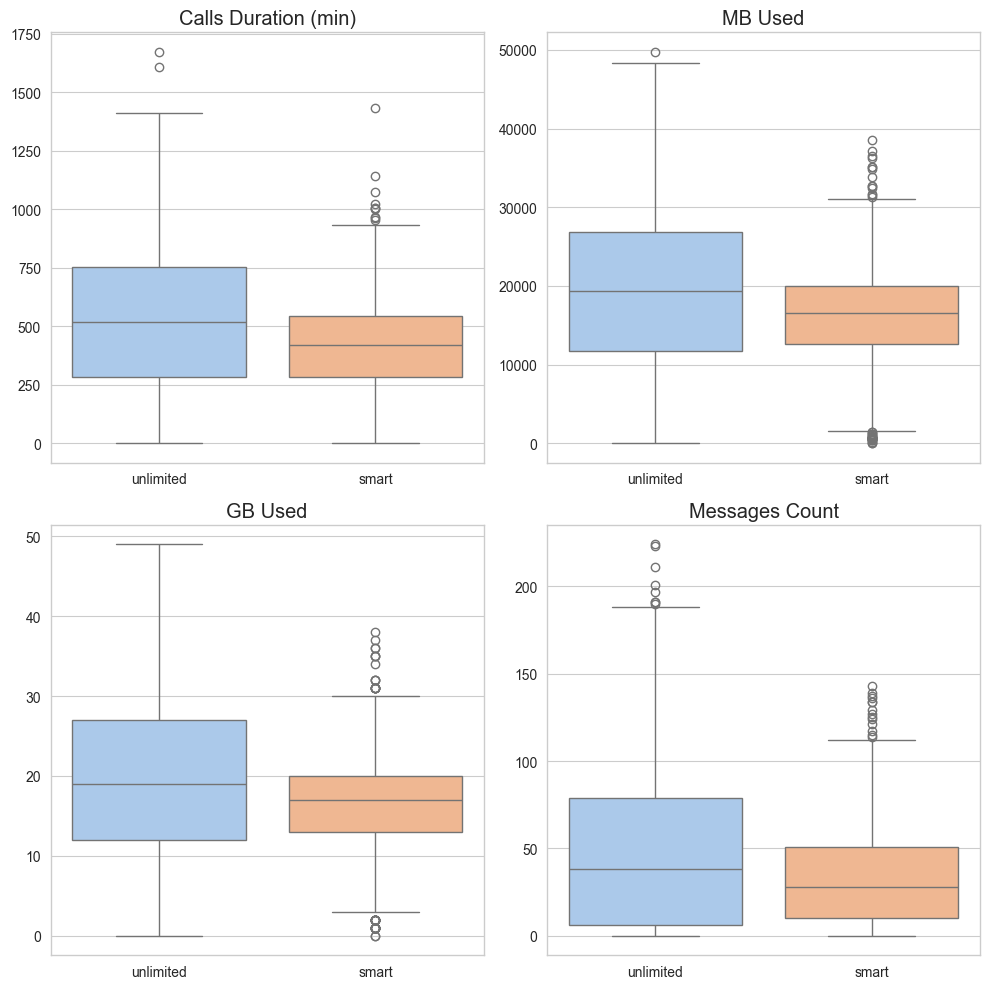

In [437]:
fix, axes = plt.subplots(2, 2, figsize=(10, 10))

labels = ['Calls Duration (min)', 'MB Used', 'GB Used', 'Messages Count']
columns = ['calls_duration', 'mb_used_sum', 'gb_used_sum', 'msg_count']

for ax, column, label in zip(axes.flatten(), columns, labels):
    sns.boxplot(data=users_pivot, x='tariff', y=column, ax=ax, hue='tariff')
    ax.set_title(label)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

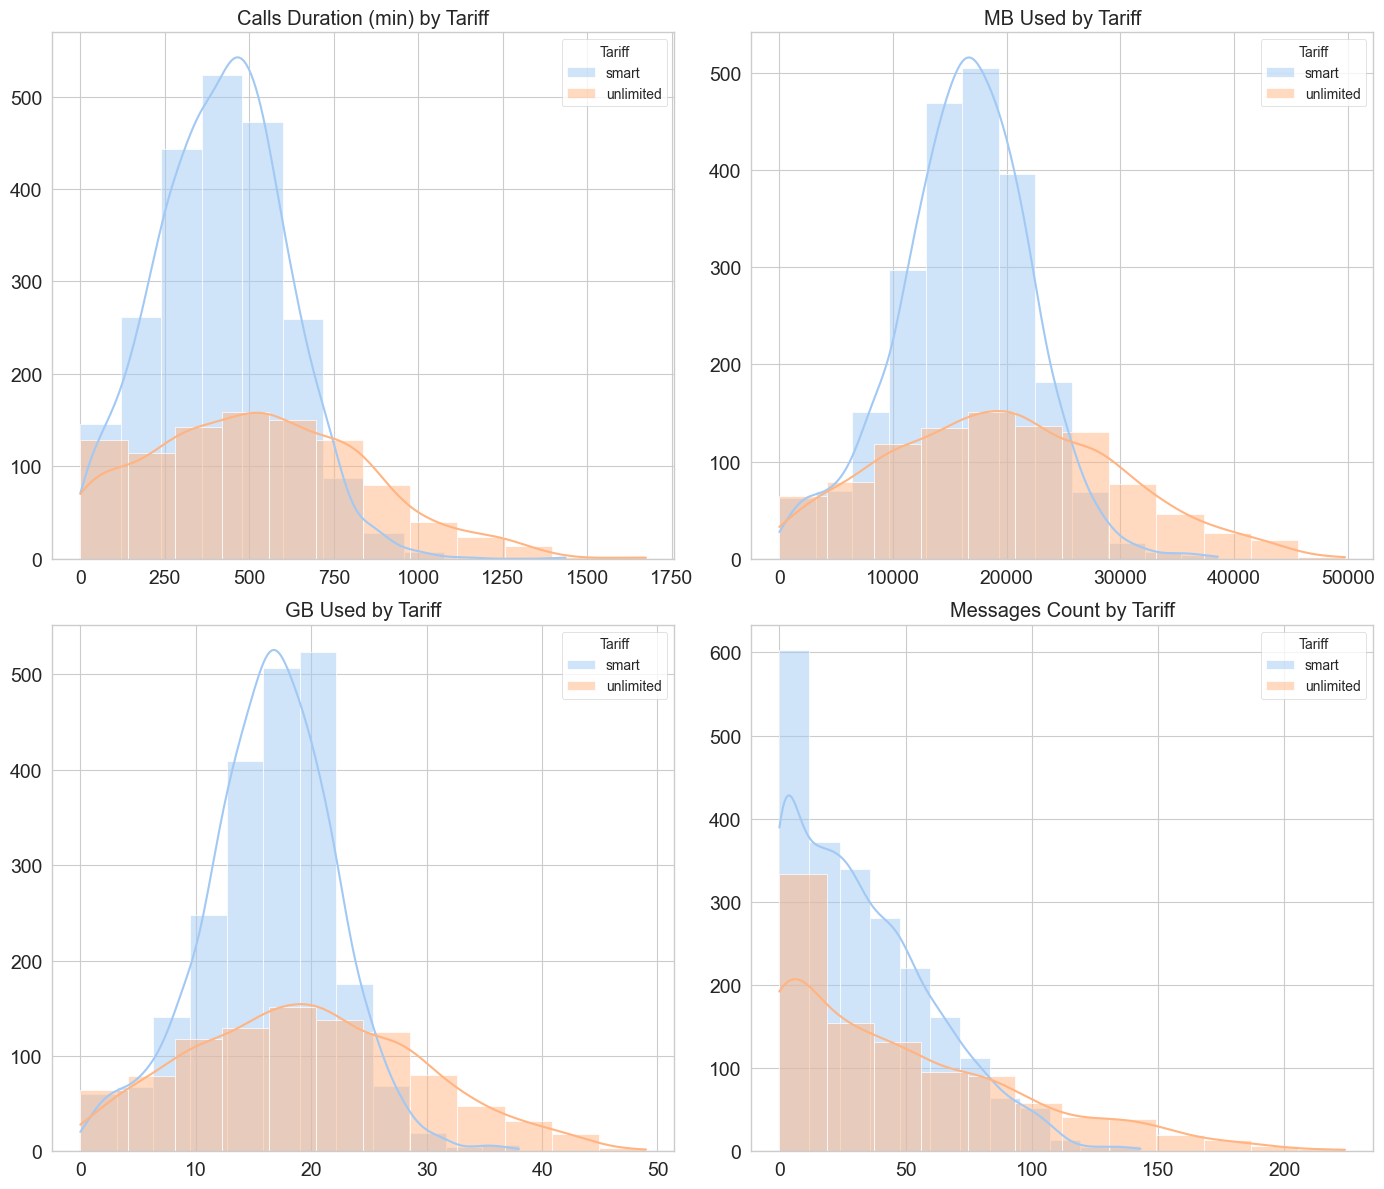

In [438]:
plt.figure(figsize=(12, 6))

tariffs = ['smart', 'unlimited']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, label, column in zip(axes, labels, columns):
    for tariff in tariffs:
        sns.histplot(
            data=users_pivot.query('tariff == @tariff'),
            x=column,
            kde=True,
            bins=12,
            label=tariff,
            ax=ax
        )

    ax.set_title(f'{label} by Tariff')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend(title='Tariff')
    ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

From boxplots and histograms we can clearly see that dispersions and spreads are larger for the Unlimited tariff, as well as mean and median values are shifted to a larger extent for the Unlimited tariff than for the Smart tariff. It should also be noted that there are fewer outliers among the Unlimited tariff values.

The distributions of call duration and used traffic for both tariffs are close to a normal distribution and relatively symmetrical, but have ‘heavy’ tails. We will assume that the distribution of these values is Student's distribution.

The histogram of the distribution of the number of sent messages has a pronounced slope to the right. This histogram also clearly shows that the mean value is larger than the median.

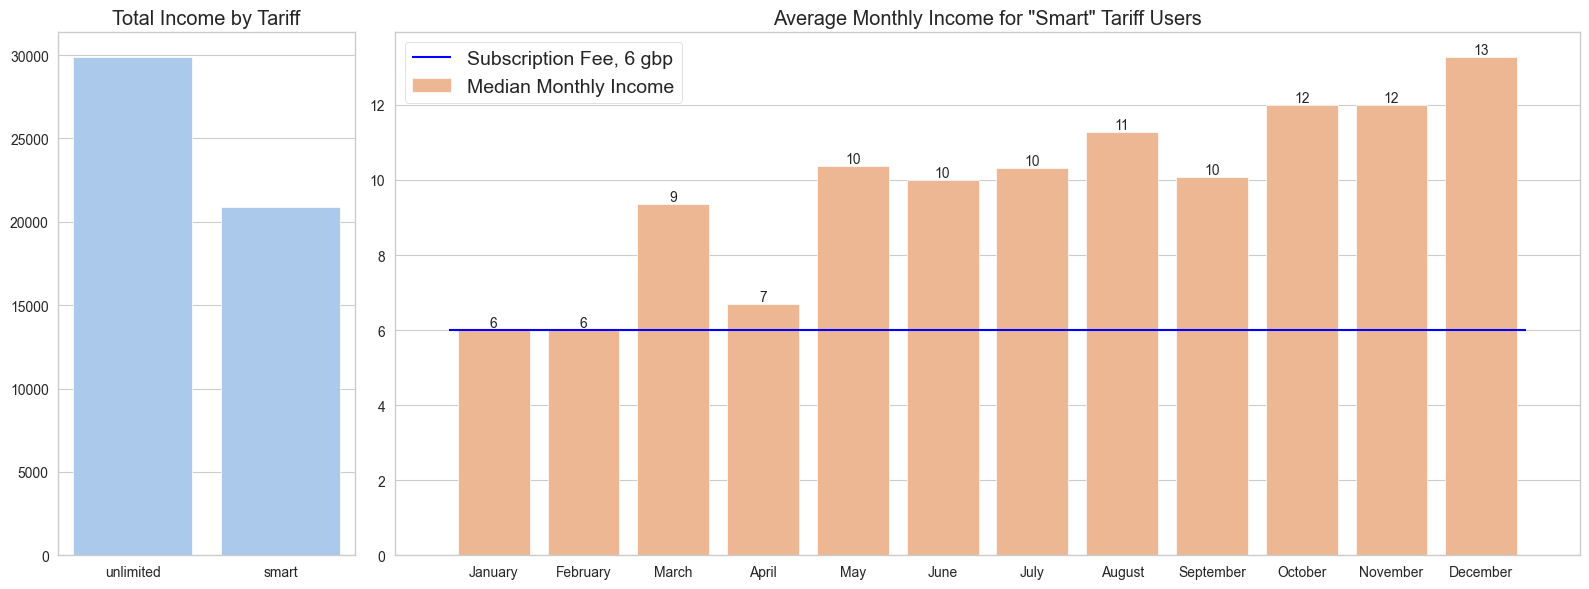

In [439]:
tariffs = users_pivot['tariff'].unique()
monthly_income_smart = (users_pivot.query('tariff == "smart"')
                        .pivot_table(index='month', values='total_income', aggfunc='median')
                        .assign(month_name=['January', 'February', 'March', 'April', 'May', 'June',
                                            'July', 'August', 'September', 'October', 'November', 'December']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 4]})

sns.barplot(x=tariffs, 
            y=users_pivot.groupby('tariff')['total_income'].sum(),
            ax=ax1).set(title='Total Income by Tariff', ylabel='', xlabel='')

sns.barplot(x='month_name', y='total_income', color='#fcb484', data=monthly_income_smart, ax=ax2, label='Median Monthly Income')
ax2.hlines(6, -0.5, 11.5, color='blue', label='Subscription Fee, 6 gbp')
ax2.set(title='Average Monthly Income for "Smart" Tariff Users', ylabel='', xlabel='')
ax2.legend(fontsize=14)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Data analysis showed that:

- On average, "Smart" users talk for 422 minutes per month, use 16.5 GB of data, and send 28 messages, whereas "Unlimited" users talk for 518 minutes, use 19 GB of data, and send 38 messages.
- The variance is higher for the "Unlimited" plan, indicating a greater spread in usage values.
- Box plots and histograms revealed that "Unlimited" users tend to use services more actively while staying within limits, whereas "Smart" users frequently purchase extra data.
- In December, the average "Smart" bill was 13 gbp, which is more than twice the standard subscription fee.
- The annual revenue from "Smart" users was 29,8 thousands gbp, while "Unlimited" users contributed 20,8 thousands gbp.

## Hypothesis validation

Let's validate the hypothesis that the average revenue from users of the ‘Smart’ tariff is equal to the average revenue from users from the ‘Unlimited’ tariff.

*H*<sub>0</sub> - average revenue from Unlimited tariff users is equal to average revenue from Smart tariff users

*H*<sub>1</sub> - average revenues differ

α = 0.1% - significance rate

In [440]:
alpha = .001

In [441]:
smart = users_pivot.query('tariff=="smart"')['total_income']
unlimited = users_pivot.query('tariff=="unlimited"')['total_income']

Let's find out how dispersions of samples of smart and unlimited tariff users differ. We set the degree of freedom to 1, since we are working with samples from the general population.

In [442]:
print('Variance of Smart users:', smart.var(ddof=1))
print('Variance of Unlimited users:', unlimited.var(ddof=1))

Variance of Smart users: 66.97857080064242
Variance of Unlimited users: 14.15167450786183


Let's test the hypothesis with T-Test

In [443]:
results = stats.ttest_ind(smart, unlimited, equal_var=False) 
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 4.2606313931066396e-250
Rejecting the null hypothesis


For the sake of clarity, let's derive the calculated figures:

In [444]:
users_pivot.pivot_table(index='tariff', values='total_income', aggfunc='mean')

,total_income
tariff,
smart,13.399735
unlimited,21.201523


Based on the results of hypothesis testing, we can also state with a probability of 99.9% that the average revenue of the user of the Smart and Unlimited tariff are different.

Let's validate the hypothesis that the average revenue from users from London is equal to the average revenue from users from other regions.

*H*<sub>0</sub> - average revenue of users from London is equal to the average revenue of users from other cities.

*H*<sub>1</sub> - average revenues differ

α = 0.1% - significance level

In [445]:
alpha = .001

In [446]:
london = users_pivot.query('city == "London"')['total_income']
others = users_pivot.query('city != "London"')['total_income']

Let's calculate the variance for the distributions.

In [447]:
print('Variance of London users', london.var(ddof=1))
print('Varience of users from other cities', others.var(ddof=1))

Variance of London users 56.56364670118859
Varience of users from other cities 65.41376285218115


The variance of the samples are different, the samples are independent, to test the hypothesis we calculate the significance level similar to the way we calculated it for the previous hypothesis.

In [448]:
results = stats.ttest_ind(london, others, equal_var=False) 
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.5257376663729364
Failed to reject the null hypothesis


In this case we failed to reject the null hypothesis. This suggests that **with a probability of 43.5%, comparing average revenues, we would get similar values.**

In [449]:
cities = users_pivot.copy()
cities.loc[cities.loc[:,'city'] != 'London', 'city'] = 'Other City'

In [450]:
cities.pivot_table(index='city', values='total_income', aggfunc='mean')

,total_income
city,
London,15.967136
Other City,15.749362


As we can see, the mean values differ insignificantly, which is confirmed by the null hypothesis.

Let's save user pivot table for further use in tableau

In [451]:
telcom_users = users_pivot.reset_index()
telcom_users.to_csv('./datasets/telcom_users.csv')

In [452]:
telcom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int32  
 2   calls_count     3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   mb_used_sum     3214 non-null   float64
 5   msg_count       3214 non-null   float64
 6   tariff          3214 non-null   object 
 7   city            3214 non-null   object 
 8   gb_used_sum     3214 non-null   int64  
 9   total_income    3214 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(2)
memory usage: 238.7+ KB
